In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score
from scipy.stats import ranksums
import os
%matplotlib inline

In [25]:
var_to_plot = "median"
palette = "colorblind"

sims_to_plot = [8,9]

context_depth = 1;
nback_depth = 1;
include_tau = True

file_suffix = f"_cd{context_depth}_nb{nback_depth}"
if(not include_tau):
    file_suffix  += f"_no_tau"

parameter_name_map = {"alpha" : "concentration", 
                      "context_similarity_depth_1" : "context weight level 1",
                      "context_similarity_depth_2" : "context weight level 2", 
                      "repeat_bias_1_back" : "repeat bias",
                      "timeconstant_within_session_A" : "time constant"}
sim_name_map = {0 : "sim. 1",
                1 : "sim. 2",
                2 : "sim. 1",
                3 : "sim. 2",
                4 : "OLD pop. sim 1",
                5 : "OLD pop. sim 2",
                6 : "pop. sim 1b",
                7 : "pop. sim 2b",
                8 : "sim. 1",
                9 : "sim. 2",
                10: "pop. sim. 1",
                11: "pop. sim. 2",
                12 : "sim. 3",
                13 : "sim. 4",}

def load_summary(sim, block):
    df_a  = pd.DataFrame()
    df2_a = pd.DataFrame()

    if(isinstance(sim,int)):
        sim = [sim]
    if(isinstance(block,int)):
        block = [block]

    for sim_c in sim:
        for block_c in block:
            #print(f"sim {sim_c}, block {block_c}")
            # df = pd.read_pickle(f"Results/Simulations/sim_summary_{sim_c}_block_{block_c}.pkl")
            df = pd.read_pickle(f"Results/Simulations/sim_summary_{sim_c}_block_{block_c}{file_suffix}.pkl")
            df.index.name = "parameter"
            df = df.reset_index()
            df["simulation"] = sim_c
            df["parameter"] = df["parameter"].map(parameter_name_map)
            df["simulation_idx"] = df["simulation"]
            df["simulation"] = df["simulation"].map(sim_name_map)
            df2 = df.pivot(index=["simulation","block","run"],columns=["parameter"], values=[var_to_plot]).droplevel(0,axis=1)

            df_a  = pd.concat([df_a, df])
            df2_a = pd.concat([df2_a,df2])
    ms = df2_a.reset_index().groupby(["simulation","block"]).mean()
    return df_a, df2_a, ms

def load_samples(sim, block):
    df = pd.read_pickle(f"Results/Simulations/sim_{sim}_block_{block}{file_suffix}.pkl")
    df.rename(columns=parameter_name_map, inplace=True)
    df["simulation_idx"] = df["simulation"]
    df["simulation"] = df["simulation"].map(sim_name_map)
    return df


In [26]:
def plot_params_over_blocks(sim,block=range(1,11)):
    if(isinstance(sim, pd.DataFrame)):
        a = sim;
    else:
        if(isinstance(sim,int)):
            sim = [sim]
        if(isinstance(block,int)):
            block = [block]



        a,_,_ = load_summary(sim,block)
        a.reset_index();

    xlabel = "trials"

    trial_number_map = lambda x : 10 if x < 8 else 25;


    a[xlabel]  = a["block"].astype(int) * (a["simulation_idx"].apply(trial_number_map))
    
    g = sns.FacetGrid(a, row="parameter", height=1.5, aspect=10/(1.5), sharey=False);
    g.map_dataframe(sns.pointplot, x=xlabel, y=var_to_plot, errorbar=("pi",90), dodge=0.1, hue="simulation", palette=palette);
    g.map_dataframe(sns.pointplot, x=xlabel, y="true",  linestyles="--", markers="", hue="simulation", palette=palette); #
    g.add_legend()
    for ax in g.axes[:,0]:
        ax.set_ylabel(None);
    
    g.axes[-1,0].set_ylabel('estimate')
    return g;


In [27]:

def plot_params_per_sim(sim,block):
    if(isinstance(sim,int)):
        sim = [sim]
    assert isinstance(block,int) or len(block)==1, "only one block"
    a,_,_ = load_summary(sim,block)
    a.reset_index();

    dodge = 0.2 if len(sim) > 1 else False;

    g = sns.FacetGrid(a, col="parameter",  height=3, aspect=1, sharey=False);
    g.map_dataframe(sns.stripplot, x="simulation", hue="simulation", y=var_to_plot, dodge=False, alpha=0.75, palette=palette,size=2); #
    g.map_dataframe(sns.pointplot, x="simulation", y="true", dodge=dodge, linestyles="none", markers="d", markersize=6, palette=palette, errorbar=None,linewidth=0.5,alpha=1,  hue="simulation");
    g.map_dataframe(sns.pointplot, x="simulation", y=var_to_plot,
                    dodge=False, linestyles="none", markers="o",
                    markersize=4, palette=palette, errorbar=("pi",90),
                    linewidth=1, alpha=1,  hue="simulation");
    return g;


In [28]:
plot_params_over_blocks(sims_to_plot,range(1,20+1));

/home/latimerk/anaconda3/envs/JaiYuLab/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


/home/latimerk/anaconda3/envs/JaiYuLab/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/latimerk/anaconda3/envs/JaiYuLab/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/latimerk/anaconda3/envs/JaiYuLab/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


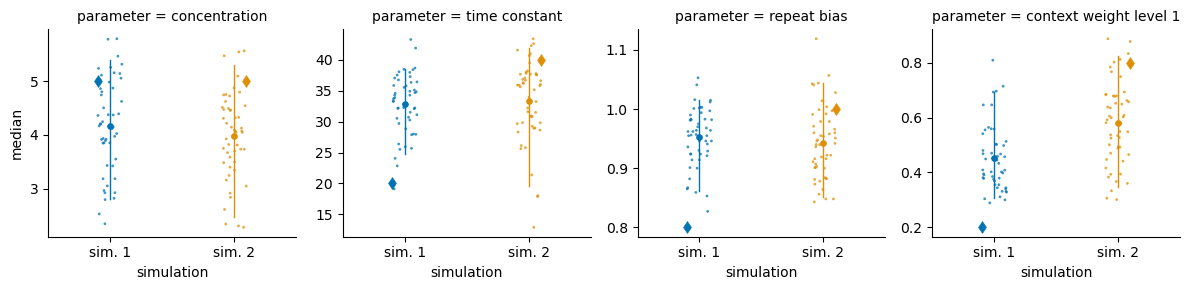

In [ ]:
block = 4;
plot_params_per_sim(sims_to_plot, block)